In [137]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
import mglearn

In [34]:
class SVM:
    def __init__(self,lr=0.001,lambda_par=0.01,epoch=1000):
        self.lr=lr
        self.lambda_par=lambda_par
        self.epoch=epoch
        self.w=None
        self.b=None
    def fit(self,X,y):
        y_=np.where(y<=0,-1,1)
        n_samples,n_features=X.shape
        self.w=np.zeros(n_features)
        self.b=0
        
        for _ in range(self.epoch):
            for index,x_i in enumerate(X):
                condition=y_[index]*(np.dot(x_i,self.w)-self.b)
                if condition >=1:
                    self.w-=self.lr*(2*self.lambda_par*self.w)
                else:
                    self.w-=self.lr*(2*self.lambda_par*self.w-np.dot(x_i,y_[index]))
                    self.b-=self.lr*(y_[index])
    
    def Predict(self,X):
        output=np.dot(X,self.w)-self.b
        return output

[-0.86720721 -1.39754934  1.35801607 -1.45910153 -1.33176566  1.41125641
  0.96202464 -1.27877469 -1.28155666 -1.13002117 -1.45892185 -1.35154224
  1.45765284 -1.16200229  1.32760482 -1.69625296  1.54577623  1.24197608
  1.42993206  1.24642543  1.72167777  1.54592966 -1.52336076  1.35107017
 -1.79780673 -1.21282839  1.4999211   1.16100443 -1.74341662 -1.53543759]


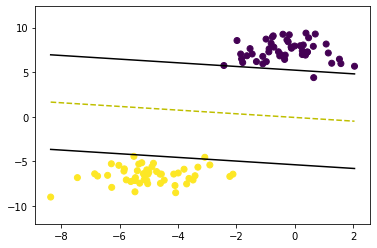

In [156]:
X,y=datasets.make_blobs(n_samples=100,n_features=2,centers=2,
                       cluster_std=1.05)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)
y=np.where(y==0,-1,1)
clf=SVM()
clf.fit(X_train,y_train)
visualize()
clf.w,clf.b
pr=clf.Predict(X_test)
print(pr)

In [114]:
def visualize():
    def get_hyperplane(x,w,b,offset):
        return(-w[0]*x+b+offset)/w[1]
    fig=pl.figure()
    ax=fig.add_subplot(1,1,1)
    
    x0_1=np.amin(X[:,0])
    x0_2=np.amax(X[:,0])
    
    x1_1=get_hyperplane(x0_1,clf.w,clf.b,0)
    x1_2=get_hyperplane(x0_2,clf.w,clf.b,0)
    
    x1_1_m=get_hyperplane(x0_1,clf.w,clf.b,-1)
    x1_2_m=get_hyperplane(x0_2,clf.w,clf.b,-1)
    
    x1_1_p=get_hyperplane(x0_1,clf.w,clf.b,1)
    x1_2_p=get_hyperplane(x0_2,clf.w,clf.b,1)
    pl.scatter(X[:,0],X[:,1],marker='o',c=y)
    ax.plot([x0_1,x0_2],[x1_1,x1_2],'y--')
    ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],'k')
    ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],'k')
    
    x1_min=np.amin(X[:,1])
    x1_max=np.amax(X[:,1])
    ax.set_ylim(x1_min-3,x1_max+3)